# K-means Clusetring
Knn과 유사하지만 Knn은 지도학습, K-means Clustering은 비지도학습이다.

K-means Clustering에서 K는 군집을 몇개 찾을건지와 관련되어 있다.

* 간단하게 진행하기 위해 sklearn datasets을 사용했다

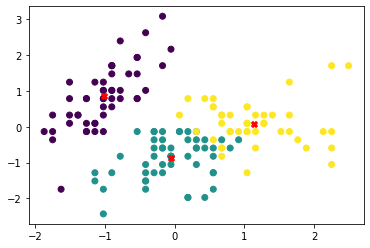

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터셋 불러오기
data = load_iris()
X = data['data']
y = data['target']

# K-means Clustering 진행
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X_scaled)

# 군집 라벨과 중심 추출하기
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 시각화하기
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.show()

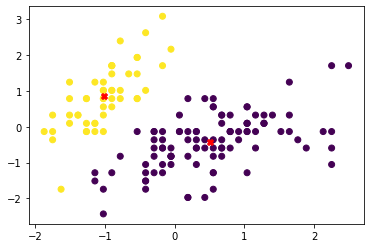

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터셋 불러오기
data = load_iris()
X = data['data']
y = data['target']

# K-means Clustering 진행
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_scaled)

# 군집 라벨과 중심 추출하기
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 시각화하기
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.show()

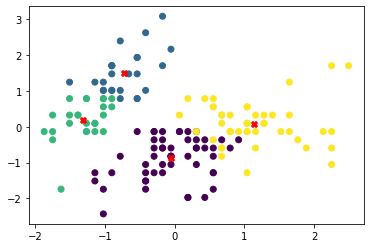

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터셋 불러오기
data = load_iris()
X = data['data']
y = data['target']

# K-means Clustering 진행
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X_scaled)

# 군집 라벨과 중심 추출하기
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 시각화하기
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')
plt.show()